In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pylab as pylab
from matplotlib import rc

In [18]:
import matplotlib.font_manager

In [19]:
al_algo = ["RALIS", "Entropy", "BALD", "Uniform", "Supervised"]
budget = [64, 384, 1792, 3584, 17792, 35584]
#values = ['0.5\%','128 (1\%)', '593 (5\%)', '960 (8\%)', '1184 (10\%)', '1424 (12\%)', '1904 (16\%)', '2384 (20\%)', '3568 (30\%)']
values = ['0.018\%','0.01\%', '0.5\%', '1\%', '5\%', '10\%']
supervised_allTrain3patients = 0.706
#ralis
ralis_mean = np.array([0.351, 0.404, 0.480, 0.479, 0.519, 0.553])
ralis_std = np.array([0.001, 0.030, 0.050, 0.015, 0.027, 0.016])
# random
random_mean = np.array([0.367, 0.357, 0.377, 0.395, 0.464, 0.490])
random_std = np.array([0.021, 0.009, 0.018, 0.036, 0.060, 0.045])
#bald
bald_mean = np.array([0.350, 0.373, 0.409, 0.364, 0.439, 0.536])
bald_std = np.array([0.000, 0.023, 0.044, 0.162, 0.161, 0.028])
#entropy
entropy_mean = np.array([0.350, 0.359, 0.402, 0.467, 0.503, 0.530])
entropy_std = np.array([0.000, 0.012, 0.017, 0.053, 0.018, 0.009])

# ralis 2 pat
#ralis_2pat_mean = np.array([0.474057  , 0.69284026, 0.82463372, 0.85787724, 0.88050497,0.88911125, 0.90334659, 0.91119586, 0.9147658])
#ralis_2pat_std = np.array([0.15874778, 0.059556  , 0.01912065, 0.00633906, 0.00339736,0.00571887, 0.00237937, 0.00116586, 0.00222876])

In [20]:
def rc_params():
    plt.rc('text', usetex=True)
    plt.rc('font', **{'family': 'serif', 'sans-serif': ['lmodern'], 'size': 20})
    plt.rc('axes', **{'titlesize': 18, 'labelsize': 18})
    plt.rc('xtick', **{'labelsize': 18})
    plt.rc('ytick', **{'labelsize': 18})
    plt.rc('legend', **{'fontsize': 18})
    plt.rc('figure', **{'figsize': (12,7)})

In [21]:
import matplotlib as mpl
#mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#ca0020","#0571b0",  "#FCBE11", "#808080", "#000000"]) 
#FFC30B
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#E10600", "#808080", "#F3D500", "#0080fe", "#000000"]) 

In [22]:
# ralis 
ralis_lower_bound = np.subtract(ralis_mean, ralis_std)
ralis_upper_bound = np.add(ralis_mean, ralis_std)
# random
random_lower_bound = np.subtract(random_mean, random_std)
random_upper_bound = np.add(random_mean, random_std)
#bald
bald_lower_bound = np.subtract(bald_mean, bald_std)
bald_upper_bound = np.add(bald_mean, bald_std)
#entropy
entropy_lower_bound = np.subtract(entropy_mean, entropy_std)
entropy_upper_bound = np.add(entropy_mean, entropy_std)

[0.351 0.404 0.48  0.479 0.519 0.553]
[0.35  0.359 0.402 0.467 0.503 0.53 ]
[0.35  0.373 0.409 0.364 0.439 0.536]
[0.367 0.357 0.377 0.395 0.464 0.49 ]


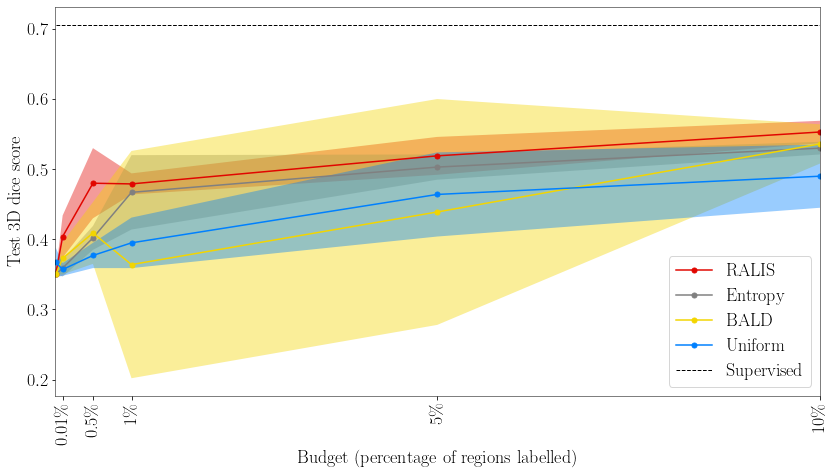

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.setp(ax.spines.values(), linewidth=0.5, color='black')
rc_params()
algos = [ralis_mean, entropy_mean, bald_mean, random_mean]
lower_bounds = [ralis_lower_bound, entropy_lower_bound, bald_lower_bound, random_lower_bound]
upper_bounds = [ralis_upper_bound, entropy_upper_bound, bald_upper_bound, random_upper_bound]
for i, algo in enumerate(algos):
    print(algo)
    plt.plot(budget, algo, label=al_algo[i], marker='o', markersize=5)
    plt.fill_between(budget, lower_bounds[i], upper_bounds[i], alpha=0.4)
plt.plot(budget, 6*[supervised_allTrain3patients], label = al_algo[4], linestyle='--', linewidth=1.0, color='black')
plt.xticks(budget[1:], values[1:])

plt.xticks(rotation=90)
plt.xlabel('Budget (percentage of regions labelled)')
#plt.xscale('log')
plt.autoscale(enable=True, axis='x')
plt.xlim(50, 35600)
plt.ylabel('Test 3D dice score')
plt.legend()
plt.tight_layout()
plt.savefig("AL-algorithms_RALIS-D_T3-BraTS.pdf")

In [24]:
################# using RC parameters
# plt.rc('text', usetex=True)
# plt.rc('font', **{'family': 'serif', 'sans-serif': ['lmodern'], 'size': 18})
# plt.rc('axes', **{'titlesize': 18, 'labelsize': 18})

#plt.tight_layout()
# define OUT_PATH, name
#OUT_PATH = '~/ralis/visualisations/'
name = 'AL-algorithms'
plt.savefig(f'{name}.pdf', bbox_inches='tight')
plt.close()